In [1]:
# -*- coding: utf-8 -*-

In [2]:
# Talha Can Kırantay - 173322003 - İstatistiksel Yazılımlar Ödevi

In [3]:
# Bu projedeki amaç bir şirketin kısa vadeli borçlarını ödeyebilme kapasitesini gösteren metriğin aşağıda açıklanmış belirli bağımsız değişkenlere göre
# bir doğrusal regresyon modeliyle tahmin edilmesidir.

In [4]:
!pip install xgboost

In [5]:
import numpy as np
import pandas as pd
np.set_printoptions(suppress=True)
import seaborn as sbn
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn import model_selection
from sklearn.model_selection import KFold 
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")

from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [6]:
np.set_printoptions(suppress=True)

In [7]:
dat=pd.read_csv("C:/Users/cnkrn/Desktop/fundamentals.csv")

In [8]:
dat.head()

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07


In [9]:
dat.dtypes

Unnamed: 0                        int64
Ticker Symbol                    object
Period Ending                    object
Accounts Payable                float64
Accounts Receivable             float64
                                 ...   
Total Revenue                   float64
Treasury Stock                  float64
For Year                        float64
Earnings Per Share              float64
Estimated Shares Outstanding    float64
Length: 79, dtype: object

In [10]:
dat.shape

(1781, 79)

In [11]:
# Veri setinde 1781 gözlem 79 sütun bulunmakta. Hipotezim doğrultusunda ilgilenmediğim sütunları çıkaracağım.

In [12]:
dat_duzenlenmis = [
    "Current Ratio",
    "Quick Ratio",
    "Cash Ratio",
    "Interest Expense",
    "Fixed Assets",
    "Other Assets",
    "Total Current Liabilities",
    "Total Liabilities",
    "Short-Term Debt / Current Portion of Long-Term Debt",
    "Capital Expenditures",
    "Deferred Liability Charges",
    "Accounts Payable",
    "Other Operating Items"
]

In [13]:
dat_guncel = dat[dat_duzenlenmis]

In [14]:
dat_guncel

,Current Ratio,Quick Ratio,Cash Ratio,Interest Expense,Fixed Assets,Other Assets,Total Current Liabilities,Total Liabilities,Short-Term Debt / Current Portion of Long-Term Debt,Capital Expenditures,Deferred Liability Charges,Accounts Payable,Other Operating Items
0,78.0,72.0,53.0,632000000.0,1.340200e+10,2.167000e+09,9.011000e+09,2.489100e+10,1.419000e+09,-1.888000e+09,223000000.0,3.068000e+09,8.450000e+08
1,104.0,96.0,75.0,856000000.0,1.925900e+10,2.299000e+09,1.380600e+10,4.500900e+10,1.446000e+09,-3.114000e+09,935000000.0,4.975000e+09,8.530000e+08
2,88.0,80.0,60.0,887000000.0,2.308400e+10,2.060000e+09,1.340400e+10,4.120400e+10,1.677000e+09,-5.311000e+09,829000000.0,4.668000e+09,1.295000e+09
3,73.0,67.0,51.0,880000000.0,2.751000e+10,2.103000e+09,1.360500e+10,4.278000e+10,2.231000e+09,-6.151000e+09,667000000.0,5.102000e+09,1.364000e+09
4,124.0,34.0,23.0,33841000.0,1.292547e+09,3.183300e+07,2.559638e+09,3.403120e+09,6.270000e+05,-2.711820e+08,0.0,2.409453e+09,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,NaN,NaN,NaN,68867000.0,9.125540e+08,9.219190e+08,0.000000e+00,5.216201e+10,3.469870e+08,-1.573610e+08,0.0,0.000000e+00,4.928200e+07
1777,237.0,146.0,43.0,113000000.0,1.295000e+09,5.800000e+07,1.415000e+09,5.618000e+09,1.500000e+07,-1.840000e+08,322000000.0,1.381000e+09,6.000000e+07
1778,319.0,200.0,81.0,117000000.0,1.318000e+09,4.800000e+07,1.086000e+09,5.277000e+09,7.000000e+06,-1.800000e+08,277000000.0,1.071000e+09,6.000000e+07
1779,215.0,133.0,65.0,124000000.0,1.307000e+09,4.900000e+07,1.781000e+09,6.845000e+09,4.050000e+08,-2.240000e+08,264000000.0,1.313000e+09,6.100000e+07


In [15]:
# 12 Bağımsız 1 bağımlı değişkenle çalışacağız.
# değişkenlerin açıklaması
# Bağımlı Değişkenimiz Current Ratio: Kısa vadeli borçların ödenebilme kapasitesini gösteren bir likidite göstergesidir.
# Quick Ratio: Nakit, menkul kıymetler ve alacakların kısa vadeli borçlara oranı. Likiditeyi gösterir.
# Cash Ratio: Sadece nakit ve nakit benzerlerinin kısa vadeli borçlara oranı. En muhafazakar likidite göstergesi.
# Interest Expense: Faiz giderleri. Şirketin borçlarından kaynaklanan faiz maliyetini gösterir.
# Fixed Assets: Maddi duran varlıklar. Binalar, makineler, araçlar gibi uzun vadeli varlıklar.
# Other Assets: Ana kalemlere girmeyen varlıklar. Patentler, marka değerleri gibi maddi olmayan varlıklar olabilir.
# Total Current Liabilities: Tüm kısa vadeli borçlar. 1 yıl içinde ödenmesi gereken yükümlülükler.
# Total Liabilities: Şirketin toplam borçları. Hem kısa hem uzun vadeli borçlar dahil.
# Short-Term Debt / Current Portion of Long-Term Debt: Kısa vadeli borçlar ve uzun vadeli borçların bir yıl içinde ödenecek kısmı.
# Capital Expenditures: Sermaye harcamaları. Duran varlıkların satın alınması için yapılan yatırım harcamaları.
# Deffered Liability Charges: Ertelenmiş yükümlülük giderleri. Gelecekte gerçekleşecek ama bugünden kayda alınmış yükümlülükler.
# Accounts Payable: Ticari borçlar. Mal ve hizmet alımlarından doğan borçlar.
# Other Operating Items: Ana faaliyet dışı ama operasyonla ilişkili diğer kalemler.

In [16]:
dat_guncel.head()

,Current Ratio,Quick Ratio,Cash Ratio,Interest Expense,Fixed Assets,Other Assets,Total Current Liabilities,Total Liabilities,Short-Term Debt / Current Portion of Long-Term Debt,Capital Expenditures,Deferred Liability Charges,Accounts Payable,Other Operating Items
0,78.0,72.0,53.0,632000000.0,1.340200e+10,2.167000e+09,9.011000e+09,2.489100e+10,1.419000e+09,-1.888000e+09,223000000.0,3.068000e+09,8.450000e+08
1,104.0,96.0,75.0,856000000.0,1.925900e+10,2.299000e+09,1.380600e+10,4.500900e+10,1.446000e+09,-3.114000e+09,935000000.0,4.975000e+09,8.530000e+08
2,88.0,80.0,60.0,887000000.0,2.308400e+10,2.060000e+09,1.340400e+10,4.120400e+10,1.677000e+09,-5.311000e+09,829000000.0,4.668000e+09,1.295000e+09
3,73.0,67.0,51.0,880000000.0,2.751000e+10,2.103000e+09,1.360500e+10,4.278000e+10,2.231000e+09,-6.151000e+09,667000000.0,5.102000e+09,1.364000e+09
4,124.0,34.0,23.0,33841000.0,1.292547e+09,3.183300e+07,2.559638e+09,3.403120e+09,6.270000e+05,-2.711820e+08,0.0,2.409453e+09,0.000000e+00


In [17]:
dat_guncel.dtypes

Current Ratio                                          float64
Quick Ratio                                            float64
Cash Ratio                                             float64
Interest Expense                                       float64
Fixed Assets                                           float64
Other Assets                                           float64
Total Current Liabilities                              float64
Total Liabilities                                      float64
Short-Term Debt / Current Portion of Long-Term Debt    float64
Capital Expenditures                                   float64
Deferred Liability Charges                             float64
Accounts Payable                                       float64
Other Operating Items                                  float64
dtype: object

In [18]:
dat_guncel.shape

(1781, 13)

In [19]:
dat_guncel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 13 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Current Ratio                                        1482 non-null   float64
 1   Quick Ratio                                          1482 non-null   float64
 2   Cash Ratio                                           1482 non-null   float64
 3   Interest Expense                                     1781 non-null   float64
 4   Fixed Assets                                         1781 non-null   float64
 5   Other Assets                                         1781 non-null   float64
 6   Total Current Liabilities                            1781 non-null   float64
 7   Total Liabilities                                    1781 non-null   float64
 8   Short-Term Debt / Current Portion of Long-Term Debt  1781 non-null  

In [20]:
dat_guncel.isnull().values.any()

True

In [21]:
# Görüldüğü üzere NA değerlerimiz var. Temizleyelim.

In [22]:
dat_tmz = dat_guncel.dropna()

In [23]:
dat_tmz.isnull().values.any()

False

In [24]:
dat_tmz.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1482 entries, 0 to 1780
Data columns (total 13 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Current Ratio                                        1482 non-null   float64
 1   Quick Ratio                                          1482 non-null   float64
 2   Cash Ratio                                           1482 non-null   float64
 3   Interest Expense                                     1482 non-null   float64
 4   Fixed Assets                                         1482 non-null   float64
 5   Other Assets                                         1482 non-null   float64
 6   Total Current Liabilities                            1482 non-null   float64
 7   Total Liabilities                                    1482 non-null   float64
 8   Short-Term Debt / Current Portion of Long-Term Debt  1482 non-null   floa

In [25]:
# NA'ları temizleyince 1482 gözleme düştük.

In [26]:
dat_tmz.corr()

,Current Ratio,Quick Ratio,Cash Ratio,Interest Expense,Fixed Assets,Other Assets,Total Current Liabilities,Total Liabilities,Short-Term Debt / Current Portion of Long-Term Debt,Capital Expenditures,Deferred Liability Charges,Accounts Payable,Other Operating Items
Current Ratio,1.000000,0.934320,0.862804,-0.232349,-0.210888,-0.176403,-0.189102,-0.192062,-0.161351,0.165252,-0.170016,-0.164236,-0.153612
Quick Ratio,0.934320,1.000000,0.932898,-0.195264,-0.178133,-0.137394,-0.158902,-0.144088,-0.122208,0.123267,-0.126981,-0.159642,-0.110790
Cash Ratio,0.862804,0.932898,1.000000,-0.163732,-0.152346,-0.127577,-0.116383,-0.129122,-0.098097,0.106233,-0.102146,-0.124794,-0.099373
Interest Expense,-0.232349,-0.195264,-0.163732,1.000000,0.504452,0.447123,0.373537,0.666561,0.294575,-0.440670,0.570190,0.353875,0.503774
Fixed Assets,-0.210888,-0.178133,-0.152346,0.504452,1.000000,0.451851,0.555757,0.727906,0.411611,-0.923370,0.827793,0.567360,0.762216
Other Assets,-0.176403,-0.137394,-0.127577,0.447123,0.451851,1.000000,0.427401,0.559331,0.313792,-0.386928,0.426247,0.354804,0.294553
Total Current Liabilities,-0.189102,-0.158902,-0.116383,0.373537,0.555757,0.427401,1.000000,0.847083,0.726760,-0.594359,0.410533,0.920040,0.318562
Total Liabilities,-0.192062,-0.144088,-0.129122,0.666561,0.727906,0.559331,0.847083,1.000000,0.642247,-0.738443,0.697635,0.771474,0.597246
Short-Term Debt / Current Portion of Long-Term Debt,-0.161351,-0.122208,-0.098097,0.294575,0.411611,0.313792,0.726760,0.642247,1.000000,-0.378957,0.281703,0.490388,0.189507
Capital Expenditures,0.165252,0.123267,0.106233,-0.440670,-0.923370,-0.386928,-0.594359,-0.738443,-0.378957,1.000000,-0.807209,-0.608823,-0.790479


In [27]:
# EN KÜÇÜK KARELER YÖNTEMİ

In [28]:
y = dat_tmz['Current Ratio']
x = dat_tmz.drop('Current Ratio', axis=1)

In [29]:
import statsmodels.formula.api as smf

In [30]:
dat_tmz = dat_tmz.rename(columns={
     "Current Ratio": "Current_Ratio",
     "Quick Ratio": "Quick_Ratio",
     "Cash Ratio": "Cash_Ratio",
     "Interest Expense": "Interest_Expense",
     "Fixed Assets": "Fixed_Assets",
     "Other Assets": "Other_Assets",
     "Total Current Liabilities": "Total_Current_Liabilities",
     "Total Liabilities": "Total_Liabilities",
     "Short-Term Debt / Current Portion of Long-Term Debt": "Short_Term_Debt_Current_Portion_of_Long_Term_Debt",
     "Capital Expenditures": "Capital_Expenditures",
     "Deferred Liability Charges": "Deferred_Liability_Charges",
     "Accounts Payable": "Accounts_Payable",
     "Other Operating Items": "Other_Operating_Items"
 })
 

In [31]:
model = smf.ols("Current_Ratio ~ Quick_Ratio + Cash_Ratio + Interest_Expense + Fixed_Assets + Other_Assets + Total_Current_Liabilities + Total_Liabilities + Short_Term_Debt_Current_Portion_of_Long_Term_Debt + Capital_Expenditures + Deferred_Liability_Charges + Accounts_Payable + Other_Operating_Items ",
                data=dat_tmz)

In [32]:
mod1=model.fit()

In [33]:
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Current_Ratio   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     912.3
Date:                Fri, 18 Apr 2025   Prob (F-statistic):               0.00
Time:                        15:32:43   Log-Likelihood:                -7712.2
No. Observations:                1482   AIC:                         1.545e+04
Df Residuals:                    1469   BIC:                         1.552e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                            42.4969      2.718     15.634      0.000      37.165      47.829
Quick_Ratio                                           1.0543      0.029     36.953      0.000       0.998       1.110
Cash_Ratio                                           -0.0680      0.032     -2.095      0.036      -0.132      -0.004
Interest_Expense                                  -8.937e-09   4.59e-09     -1.946      0.052   -1.79e-08    7.24e-11
Fixed_Assets                                       2.083e-10    1.7e-10      1.222      0.222   -1.26e-10    5.43e-10
Other_Assets                                       -9.65e-10   6.39e-10     -1.511      0.131   -2.22e-09    2.88e-10
Total_Current_Liabilities                         -2.385e-09   5.97e-10     -3.993      0.000   -3.56e-09   -1.21e-09
Total_Liabilities                                  7.982e-12    1.5e-10      0.053      0.958   -2.87e-10    3.03e-10
Short_Term_Debt_Current_Portion_of_Long_Term_Debt  1.058e-09   8.27e-10      1.279      0.201   -5.64e-10    2.68e-09
Capital_Expenditures                               2.431e-09   1.14e-09      2.137      0.033    1.99e-10    4.66e-09
Deferred_Liability_Charges                         1.441e-10    5.4e-10      0.267      0.790   -9.15e-10     1.2e-09
Accounts_Payable                                    3.21e-09   5.77e-10      5.559      0.000    2.08e-09    4.34e-09
Other_Operating_Items                             -1.262e-09   1.11e-09     -1.136      0.256   -3.44e-09    9.18e-10
==============================================================================
Omnibus:                      790.838   Durbin-Watson:                   0.591
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7099.436
Skew:                           2.334   Prob(JB):                         0.00
Kurtosis:                      12.653   Cond. No.                     9.61e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.61e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
y_hat0 = mod1.fittedvalues # Tahminler

In [35]:
y_hat0

0        94.281379
1       109.162966
2        88.339043
3        75.548510
4        77.710401
           ...    
1772    264.713291
1777    193.340638
1778    247.448054
1779    177.276986
1780    215.222683
Length: 1482, dtype: float64

In [36]:
# Performans metrikleri
print("MSE:", mean_squared_error(y, y_hat0))
print("R^2:", r2_score(y, y_hat0))
print("RMSE:", np.sqrt(mean_squared_error(y, y_hat0)))
print("MAPE:", mean_absolute_percentage_error(y, y_hat0))

MSE: 1939.0900340487576
R^2: 0.8816909428102331
RMSE: 44.03510002314923
MAPE: 0.20788061679528363


<Axes: xlabel='Current Ratio'>

Text(0.5, 0, 'Gerçek Current Ratio')

Text(0, 0.5, 'Tahmin Edilen Current Ratio')

Text(0.5, 1.0, 'Gerçek vs Tahmin Edilen Current Ratio')

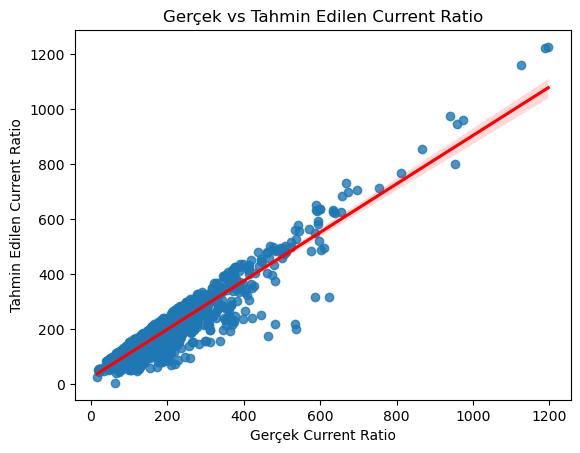

In [37]:
# Grafik
sbn.regplot(x=y, y=y_hat0, line_kws={"color": "red"})
plt.xlabel("Gerçek Current Ratio")
plt.ylabel("Tahmin Edilen Current Ratio")
plt.title("Gerçek vs Tahmin Edilen Current Ratio")
plt.show()

In [38]:
# Modelin Açıklayıcı Gücü: Modelin R-squared değeri 0.882 olup, bağımlı değişken (Current_Ratio) varyansının %88.2'sini açıklayabilmektedir.
# Düzeltilmiş R-squared değeri ise 0.881'dir, bu da modelin yüksek açıklayıcılığa sahip olduğunu gösterir.

In [39]:
# Anlamlı Değişkenler:

# Quick_Ratio: Pozitif yönlü ve oldukça anlamlı bir etkiye sahiptir (p < 0.001). Current_Ratio üzerinde en güçlü belirleyicidir.

# Cash_Ratio: Negatif yönlü ve istatistiksel olarak anlamlıdır (p = 0.036), yani nakit oranı arttıkça Current_Ratio düşme eğilimindedir.

# Total_Current_Liabilities: Negatif etkiye sahip ve çok anlamlıdır (p < 0.001), kısa vadeli yükümlülüklerin artışı Current_Ratio'yu düşürür.

# Accounts_Payable: Pozitif ve çok anlamlıdır (p < 0.001), tedarikçilere olan borçlar Current_Ratio'yu artırır.

In [40]:
# Sınırda Anlamlı Değişkenler:

# Interest_Expense: Negatif etkisi vardır ve p = 0.052 ile sınırda anlamlıdır. 
# Faiz giderlerinin Current_Ratio üzerinde zayıf bir baskılayıcı etkisi olabilir.

# Capital_Expenditures: Pozitif etkiye sahiptir ve p = 0.033 ile anlamlıdır, sermaye harcamaları Current_Ratio'yu artırabilir.



In [41]:
# Baktığımız sınırlı testlere göre anlamsız değişkenler:

# Fixed_Assets, Other_Assets, Total_Liabilities, Short_Term_Debt_Current_Portion_of_Long_Term_Debt, Deferred_Liability_Charges, Other_Operating_Items
#gibi değişkenlerin p > 0.05 olması nedeniyle istatistiksel olarak anlamlı bir etkisi yoktur.

In [42]:
# Modelin Genel Anlamlılığı: F-istatistiği 912.3 ve p = 0.00 olması, modelin bağımlı değişkeni açıklamada istatistiksel olarak anlamlı olduğunu gösterir.

In [43]:
# Multicollinearity Sorunu: Koşul sayısının (Cond. No.) 9.61e+10 gibi çok yüksek olması,
# değişkenler arasında şiddetli multicollinearity olduğuna işaret eder. Bu, modelin güvenilirliğini sorgulatabilir.

In [44]:
# Normallik ve Otokorelasyon:

# Omnibus (p = 0.00) ve Jarque-Bera (p = 0.00) testleri, hata terimlerinin normal dağılmadığını gösterir.

# Durbin-Watson (0.591): Değerin 2'den uzak olması (özellikle 1'den küçük olması), pozitif otokorelasyon olduğu yönünde bir belirteçtir.

In [45]:
# Çarpıklık ve Basıklık:

# Skewness (2.334): Veriler sağa çarpıktır.

# Kurtosis (12.653): Normal dağılıma göre çok daha sivri (leptokurtic) bir yapı vardır, bu da aykırı değerlerin etkisini gösterir.

In [46]:
# Sonuç: Model yüksek açıklayıcılığa sahip olsa da, multicollinearity, normallik ihlali ve otokorelasyon gibi ciddi sorunlar içermektedir.

In [47]:
# LINEAR REGRESSION

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
x = dat_tmz.drop(columns=["Current_Ratio"])
y = dat_tmz["Current_Ratio"]

In [50]:
model2 = LinearRegression()

In [51]:
mod2 = model2.fit(x, y)

In [52]:
print("MODELDEN ELDE EDİLEN VERİLER\n")
print("Beta0 (intercept):", mod2.intercept_)
print("Katsayılar (coefficients):", mod2.coef_)
print("R^2 Score:", mod2.score(x, y))


MODELDEN ELDE EDİLEN VERİLER

Beta0 (intercept): 42.496909083039014
Katsayılar (coefficients): [ 1.05425879 -0.06797755 -0.00000001  0.         -0.         -0.
  0.          0.          0.          0.          0.         -0.        ]
R^2 Score: 0.8816909428102386


In [53]:
# İlk katsayı: 1.054 — Bu muhtemelen Quick_Ratio veya Cash_Ratio. Bu değerin pozitif ve 1'e yakın olması, 
# bu değişkenin Current_Ratio üzerinde pozitif ve güçlü etkisi olduğunu gösteriyor.

# Diğerlerinin çoğu 0, -0, ya da çok küçük negatif/pozitif değerler. Bu, bu değişkenlerin modelde anlamlı bir katkı sunmadığını gösteriyor
# (ya da veri setindeki multicollineartyden ötürü etkileri bastırılmış olabilir).

In [54]:
# %88.2 gibi oldukça yüksek bir değer, modelin Current_Ratio değişkenindeki değişimin büyük kısmını açıkladığını gösteriyor.

In [55]:
# Tahminler
y_hat3 = mod2.predict(x)

In [56]:
y_hat3

array([ 94.28138504, 109.16297684,  88.33905221, ..., 247.44805149,
       177.27698297, 215.22268127])

In [57]:
# Tahmin değerlerinin büyük kısmı 100-200 aralığında yoğunlaşmış gibi görünse de, bazı uç değerler (örneğin 247.45) modelin aykırı 
# gözlemlere duyarlı olabileceğini düşündürmektedir.

In [58]:
# Performans ölçütleri
print("\nPERFORMANS ÖLÇÜTLERİ\n")
print("MSE:", mean_squared_error(y, y_hat3))
print("R^2 Score:", r2_score(y, y_hat3))
print("RMSE:", np.sqrt(mean_squared_error(y, y_hat3)))
print("MAPE:", mean_absolute_percentage_error(y, y_hat3))



PERFORMANS ÖLÇÜTLERİ

MSE: 1939.090034048667
R^2 Score: 0.8816909428102386
RMSE: 44.0351000231482
MAPE: 0.20788061462141624


In [59]:
# MSE (1939.09): Hataların karesi ortalaması yüksek, modelin tahminlerinde önemli sapmalar var.
# R-Squared (0.88): Model, bağımlı değişkenin %88'ini açıklıyor, güçlü bir uyum sergiliyor.
# RMSE (44.04): Tahminler ortalama ±44 birim hata payına sahip, pratikte kabul edilebilirliği veri ölçeğine bağlı.
# MAPE (%20.79): Ortalama %20.8'lik hata oranı, modelin tahminlerinde görece yüksek sapma olduğunu gösteriyor.

# Sonuç: Model iyi açıklayıcılığa (R-Squared) sahip ancak hata metrikleri (MSE, MAPE) daha fazla iyileştirme gerektiğini işaret ediyor.




REGPLOT İNCELEMESİ


<Axes: xlabel='Current_Ratio'>

Text(0.5, 0, 'Gerçek Current Ratio')

Text(0, 0.5, 'Tahmin Edilen Current Ratio')

Text(0.5, 1.0, 'Gerçek vs Tahmin Current Ratio (LinearRegression)')

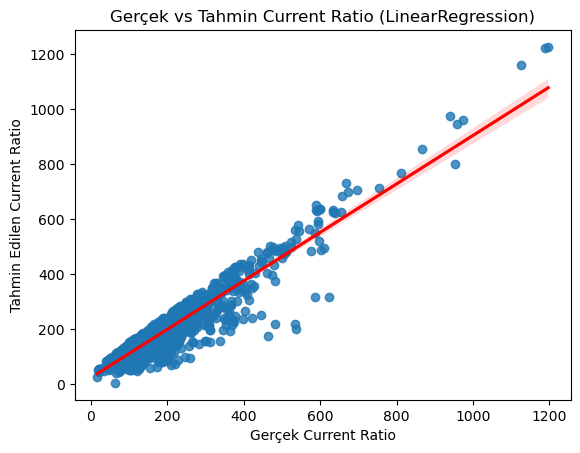

In [60]:
# Regplot çizimi
print("\nREGPLOT İNCELEMESİ")
sbn.regplot(x=y, y=y_hat3, line_kws={"color": "red"})
plt.xlabel("Gerçek Current Ratio")
plt.ylabel("Tahmin Edilen Current Ratio")
plt.title("Gerçek vs Tahmin Current Ratio (LinearRegression)")
plt.show()

In [61]:
# Model genel olarak başarılı, ancak özellikle uç değerlerde daha iyi tahmin için ayarlamalar yapılmalı.

In [62]:
# SIRADAN EN KÜÇÜK KARELER REGRESYON MODELİ - ORDINARY LEAST SQUARES - OLS

In [63]:
# Test büyüklüğü 0.3 Train büyüklüğü 0.7 olsun.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [64]:
model3 = sm.OLS(y_train, x_train).fit()

In [65]:
print(model3.summary())

                                 OLS Regression Results                                
Dep. Variable:          Current_Ratio   R-squared (uncentered):                   0.952
Model:                            OLS   Adj. R-squared (uncentered):              0.951
Method:                 Least Squares   F-statistic:                              1689.
Date:                Fri, 18 Apr 2025   Prob (F-statistic):                        0.00
Time:                        15:32:44   Log-Likelihood:                         -5525.1
No. Observations:                1037   AIC:                                  1.107e+04
Df Residuals:                    1025   BIC:                                  1.113e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--

In [66]:
#Test Tahminleri
y_pred = model3.predict(x_test)

In [67]:
# Performans metrikleri
print("\nTEST SETİ PERFORMANSI")
print("MSE :", mean_squared_error(y_test, y_pred))
print("R^2 :", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAPE:", mean_absolute_percentage_error(y_test, y_pred))


TEST SETİ PERFORMANSI
MSE : 1770.809137891533
R^2 : 0.881753266941408
RMSE: 42.08098309083966
MAPE: 0.1788281953319784


In [68]:
# Model Açıklayıcılığı (R² = 0.952)

# Model, bağımlı değişkenin (Current_Ratio) varyansının %95.2'sini açıklıyor. Önceki modele göre daha yüksek bir sonuç.

In [69]:
# Anlamlı Değişkenler (p < 0.05):

# Quick_Ratio (p=0.000): En güçlü pozitif etkiye sahip.

# Cash_Ratio (p=0.000): Negatif etkili, yani nakit oranı arttıkça Current_Ratio düşüyor.

# Interest_Expense (p=0.003): Pozitif etkili ama katsayı çok küçük (1.8e-08).

# Total_Liabilities (p=0.000): Negatif etkili, yükümlülükler arttıkça Current_Ratio azalıyor.

# Accounts_Payable (p=0.015): Pozitif etkili, tedarikçi borçları Current_Ratio'yu artırıyor.


In [70]:
# Sınırda Anlamlı Değişkenler:

# Fixed_Assets (p=0.053): Zayıf pozitif etki, anlamlılık sınırında.

In [71]:
# Anlamsız Değişkenler (p > 0.05):

# Other_Assets, Total_Current_Liabilities, Short_Term_Debt, Capital_Expenditures, Deferred_Liability_Charges, Other_Operating_Items.

In [72]:
# Multicollinearity Uyarısı (Cond. No. = 1.1e+09)

# Çok yüksek koşul sayısı, değişkenler arasında güçlü bağımlılık olduğunu gösteriyor.
# Bu katsayıların güvenilirliğini azaltabilir.

In [73]:
# Normallik ve Otokorelasyon:

# Omnibus (p=0.000) & Jarque-Bera (p=0.00): Hatalar normal dağılmıyor.

# Durbin-Watson (1.937): 2'ye yakın olduğu için otokorelasyon yok.

In [74]:
# Test Seti Performansı:
# MSE (1770.80): Tahmin hatalarının karesi ortalaması yüksek.

# R-squared (0.881): Model, test verisinde de iyi performans gösteriyor (%88 açıklayıcılık).

# RMSE (42.08): Tahminler ortalama ±42 birim hata payına sahip.

# MAPE (%17.88): Ortalama %18 hata oranı, kabul edilebilir seviyede.

In [75]:
# Model genel olarak başarılı (yüksek R-squared)

# Multicollinearity sorunu var.

# Hatalar normal dağılmıyor.

# Test performansı eğitim performansına yakın, overfitting yok.

In [76]:
# TRAIN_TEST SPLIT YÖNTEMİ VE KARŞILAŞTIRILMASI
x_egitimset, x_testset, y_egitimset, y_testset = train_test_split(x, y, test_size=0.3, random_state=42)
print("egitim:", len(x_egitimset), "  test:", len(x_testset))

egitim: 1037   test: 445


In [77]:
x_testset = x_testset[x_egitimset.columns]

In [78]:
model4 = sm.OLS(y_egitimset, x_egitimset)
mod4 = model4.fit()

In [79]:
print(mod4.summary())

                                 OLS Regression Results                                
Dep. Variable:          Current_Ratio   R-squared (uncentered):                   0.952
Model:                            OLS   Adj. R-squared (uncentered):              0.951
Method:                 Least Squares   F-statistic:                              1689.
Date:                Fri, 18 Apr 2025   Prob (F-statistic):                        0.00
Time:                        15:32:44   Log-Likelihood:                         -5525.1
No. Observations:                1037   AIC:                                  1.107e+04
Df Residuals:                    1025   BIC:                                  1.113e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--

In [80]:
# Bir önceki modelle tamamıyla aynı değerleri barındırıyor. Tüm cümleler tekrarlanabilir.

In [81]:
# TEST VE EĞİTİM SETİ KARŞILAŞTIRILMASI (mod4 için)

In [82]:
y_hat_train = mod4.predict(x_egitimset)
y_hat_test  = mod4.predict(x_testset)

In [83]:
print("EGİTİM VERİSİ MSE :", mean_squared_error(y_egitimset, y_hat_train))
print("TEST  VERİSİ MSE :", mean_squared_error(y_testset,  y_hat_test))


EGİTİM VERİSİ MSE : 2484.9632426726857
TEST  VERİSİ MSE : 1770.809137891533


In [84]:
print("EGİTİM VERİSİ R²  :", r2_score(y_egitimset, y_hat_train))
print("TEST  VERİSİ R²  :", r2_score(y_testset,  y_hat_test))


EGİTİM VERİSİ R²  : 0.85378565076485
TEST  VERİSİ R²  : 0.881753266941408


In [85]:
print("EGİTİM VERİSİ MAPE:", mean_absolute_percentage_error(y_egitimset, y_hat_train))
print("TEST  VERİSİ MAPE:", mean_absolute_percentage_error(y_testset,  y_hat_test))


EGİTİM VERİSİ MAPE: 0.18435398692938768
TEST  VERİSİ MAPE: 0.1788281953319784


In [86]:
print("EGİTİM VERİSİ RMSE:", np.sqrt(mean_squared_error(y_egitimset, y_hat_train)))
print("TEST  VERİSİ RMSE:", np.sqrt(mean_squared_error(y_testset,  y_hat_test)))

EGİTİM VERİSİ RMSE: 49.84940564011456
TEST  VERİSİ RMSE: 42.08098309083966


In [87]:
# Eğitim-Test Uyumu: Test verisindeki R-squared (0.88) eğitim verisindekinden (0.85) yüksek, modelin genelleme yeteneği iyi.

# Hata Metrikleri:

# Test MSE (1770) eğitim MSE'den (2484) düşük, model test verisinde daha iyi performans gösteriyor.

# Test RMSE (42.08) eğitim RMSE'den (49.85) düşük, tahmin hataları test verisinde daha küçük.

# MAPE Değerleri:

# Test MAPE (%17.88) eğitim MAPE'den (%18.43) daha iyi, model test verisinde daha doğru tahmin yapıyor.

# Overfitting Yok: Test metriklerinin eğitimden daha iyi olması overfitting olmadığını gösteriyor.

# Model Güvenilirliği: Tüm metriklerde tutarlı performans, modelin güvenilir olduğunu destekliyor.

In [88]:
# TEMEL BİLEŞENLER REGRESYONU (PCA)
pca_model = PCA()
x_egitimset_scaled = pca_model.fit_transform(x_egitimset)

In [89]:
# LINEER MODEL (T bileşenleri + y)
pcamodel1 = LinearRegression()
crossval = KFold(n_splits=5, shuffle=True, random_state=42)

In [90]:
# En az sayıda bileşenle en iyi tahmin performansını sağlayan PCA bileşen sayısını belirleyelim
MSE = []
for i in np.arange(1, 13):
    score = -1 * model_selection.cross_val_score(
        pcamodel1,
        x_egitimset_scaled[:, :i],
        y_egitimset,
        cv=crossval,
        scoring="neg_mean_squared_error"
    ).mean()
    MSE.append(score)
print(MSE)

[16519.48049919221, 16503.582746954915, 16594.36945913179, 16551.63728293552, 16684.703320024208, 16574.59791603973, 16612.041156963845, 16619.640505115138, 16364.390950239642, 15727.697452658404, 3891.7135496478586, 2147.0426176551023]


In [91]:
# Temel Bileşenlerle Kurulan Model
tem_model = LinearRegression()
pcaregr = tem_model.fit(x_egitimset_scaled, y_egitimset)
ysapkapca = pcaregr.predict(x_egitimset_scaled)

<Axes: xlabel='Current_Ratio'>

Text(0.5, 0, 'Gerçek Current Ratio')

Text(0, 0.5, 'Tahmin Current Ratio (PCA)')

Text(0.5, 1.0, 'Gerçek vs Tahmin Current Ratio – PCA')

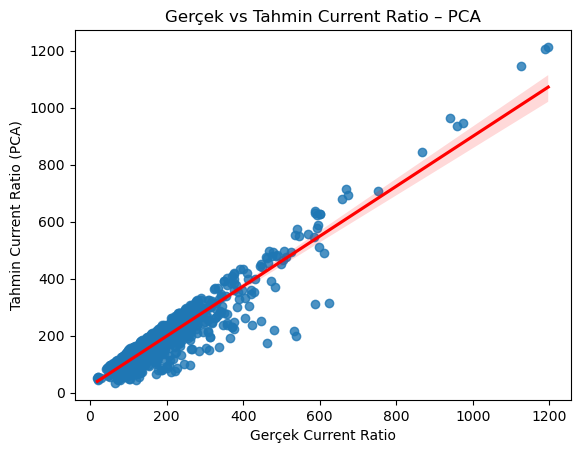

In [92]:
sbn.regplot(x=y_egitimset, y=ysapkapca, line_kws={"color": "red"})
plt.xlabel("Gerçek Current Ratio")
plt.ylabel("Tahmin Current Ratio (PCA)")
plt.title("Gerçek vs Tahmin Current Ratio – PCA")
plt.show()

In [93]:
# Performans metrikleri
print("MSE :", mean_squared_error(y_egitimset, ysapkapca))
print("R^2 :", r2_score(y_egitimset, ysapkapca))
print("RMSE:", np.sqrt(mean_squared_error(y_egitimset, ysapkapca)))
print("MAPE:", mean_absolute_percentage_error(y_egitimset, ysapkapca))

MSE : 2093.167022070489
R^2 : 0.87683880038268
RMSE: 45.75114230344953
MAPE: 0.2118042736242887


In [94]:
# MSE (2093.17)

# Ortalama karesel hata yüksek; modelin tahminlerinde belirgin sapmalar var.

# R-squared (0.877)

# Model, bağımlı değişkenin %87.7'sini açıklıyor → Yüksek açıklayıcılık.

# RMSE (45.75)

# Tahminler ortalama ±45.75 birim hata payına sahip.

# Birim bağlı: Örneğin, Current Ratio için bu hata kabul edilebilir mi?

# MAPE (%21.18)

# Ortalama %21'lik hata oranı → Kabul edilebilir sınırda, ancak iyileştirme gerekebilir.



In [95]:
# Bu metrikler model 3te şöyleydi:
# MSE : 1770.809137891533  -> Yükselmiş. Ortalama karesel hata artmış demek.
# R^2 : 0.881753266941408  -> Düşmüş. Açıklayıcılık oranımız düştü.
# RMSE: 42.08098309083966  -> Yükselmiş. Ortalama hata payımız artmış.
# MAPE: 0.1788281953319784 -> Düşmüş. Ortalama hata oranımız azalmış.

<Axes: xlabel='Current_Ratio'>

Text(0.5, 0, 'Gerçek Current Ratio')

Text(0, 0.5, 'Tahmin Current Ratio (PLS)')

Text(0.5, 1.0, 'Gerçek vs Tahmin Current Ratio – PLS')

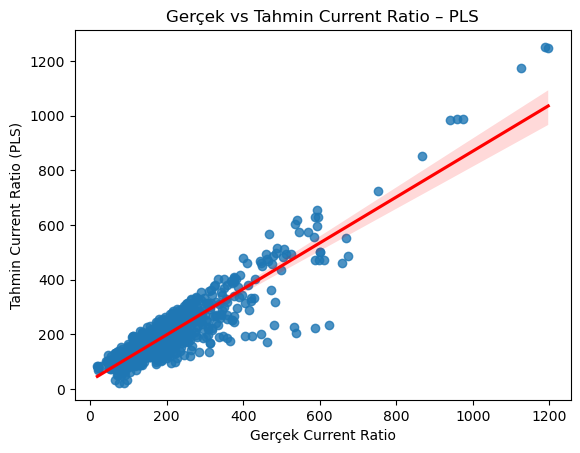

In [96]:
# KISMİ EN KÜÇÜK KARELER REGRESYONU (PLS)

plsmodel_01 = PLSRegression().fit(x_egitimset, y_egitimset)
ysapka_pls  = plsmodel_01.predict(x_egitimset)
sbn.regplot(x=y_egitimset, y=ysapka_pls, line_kws={"color": "red"})
plt.xlabel("Gerçek Current Ratio")
plt.ylabel("Tahmin Current Ratio (PLS)")
plt.title("Gerçek vs Tahmin Current Ratio – PLS")
plt.show()

In [97]:
# Optimum Bileşen Sayısı
def optimumdeg_pls(x, y, n_comp):
    pls = PLSRegression(n_components=n_comp)
    y_pred = cross_val_predict(pls, x, y, cv=10)
    return (r2_score(y, y_pred),
            mean_squared_error(y, y_pred),
            mean_absolute_percentage_error(y, y_pred))

In [98]:
R2, MSE, MAPE = [], [], []
for i in range(1, x_egitimset.shape[1]):    
    r2, mse, mape = optimumdeg_pls(x_egitimset, y_egitimset, i)
    R2.append(r2)
    MSE.append(mse)
    MAPE.append(mape)

In [99]:
print("R2 SCORES\n", R2, "\n")
print("MSE SCORES\n", MSE, "\n")
print("MAPE SCORES\n", MAPE, "\n")

R2 SCORES
 [0.6343420093510547, 0.8390231561544662, 0.8531840138891567, 0.8656268740563188, 0.8715954456978794, 0.8730171168690672, 0.874060564316081, 0.8737154489526807, 0.874038000194949, 0.8740221257084669, 0.8738987190837004] 

MSE SCORES
 [6214.483536707098, 2735.856924919697, 2495.1882686660642, 2283.7175730000286, 2182.279641510256, 2158.1178501262416, 2140.3841012496523, 2146.24945575841, 2140.7675862626456, 2141.0373786298846, 2143.1347167369245] 

MAPE SCORES
 [0.42190258921910545, 0.25328987375285544, 0.23720833281267936, 0.22863090223992152, 0.22021327083519923, 0.21981172025220788, 0.21540665568729042, 0.21594941488927621, 0.21597649145583578, 0.21567808861537444, 0.21583955090919027] 



In [100]:
# R-squared için
# Başta 0.63 ile başlıyor, sonrasında 2 bileşenle 0.83, 3-4 bileşenden sonra 0.85+ seviyelerine çıkıyor.
# 5 bileşenden sonra artık R² neredeyse ~0.874 değerine sabitlenmiş.
# Yani 5 PCA bileşeniyle veri setinin varyansının neredeyse tamamını açıklayabiliyoruz. Diğer bileşenler pek gerekli değil.

In [101]:
# MSE için
# İlk bileşende hata çok yüksek, sonra hızla düşüyor. Özellikle 4-5 bileşen sonrası düşüş yavaşlıyor, yani artık anlamlı bir iyileşme olmuyor.
# Minimum MSE değeri 2140 civarında ve bu değer 6-7 bileşenden sonra neredeyse sabit.

In [102]:
# MAPE için
# Başta %42 gibi yüksek bir yüzde hatayla başlıyor, hızla %22’lere düşüyor.
# 6 bileşenden sonra MAPE neredeyse sabitlenmiş.
# 5-6 bileşenden sonrası çok ciddi iyileştirme sağlamıyor.

In [103]:
# Hem R², hem MSE hem de MAPE açısından 5-6 bileşen yeterli.

In [104]:
# RIDGE REGRESYONU

In [105]:
ridgemdl_1 = Ridge(alpha=0.45).fit(x_egitimset, y_egitimset)
ysapka_ridge = ridgemdl_1.predict(x_egitimset)
print("R2 :", ridgemdl_1.score(x_egitimset, y_egitimset))
print("MSE:", mean_squared_error(y_egitimset, ysapka_ridge))
print("MAPE:", mean_absolute_percentage_error(y_egitimset, ysapka_ridge))
print("RMSE:", np.sqrt(mean_squared_error(y_egitimset, ysapka_ridge)))


R2 : 0.8768388003826726
MSE: 2093.1670220706146
MAPE: 0.21180428455033282
RMSE: 45.7511423034509


In [106]:
# RIDGE ALPHA OPTİMİZASYONU
alphas_for = [0.01, 0.05, 0.1, 0.3, 0.5, 0.8, 1, 1.5, 2, 5, 10]
R_2, MSE_for = [], []
for a in alphas_for:
    mdl = Ridge(alpha=a).fit(x_egitimset, y_egitimset)
    pred = mdl.predict(x_egitimset)
    R_2.append(mdl.score(x_egitimset, y_egitimset))
    MSE_for.append(mean_squared_error(y_egitimset, pred))
print("R2 SCORES :", R_2)
print("MSE SCORES:", MSE_for)
print("MAX R2 :", max(R_2), "MIN MSE:", min(MSE_for))

R2 SCORES : [0.87683880038268, 0.8768388003826799, 0.8768388003826797, 0.8768388003826767, 0.8768388003826709, 0.8768388003826566, 0.8768388003826435, 0.876838800382598, 0.8768388003825341, 0.8768388003817681, 0.8768388003790325]
MSE SCORES: [2093.167022070489, 2093.167022070491, 2093.1670220704955, 2093.1670220705446, 2093.167022070644, 2093.167022070886, 2093.167022071109, 2093.167022071884, 2093.167022072969, 2093.167022085987, 2093.167022132479]
MAX R2 : 0.87683880038268 MIN MSE: 2093.167022070489


LASSO R2 : 0.8768387820367671
LASSO MSE: 2093.1673338655983


<Axes: xlabel='Current_Ratio'>

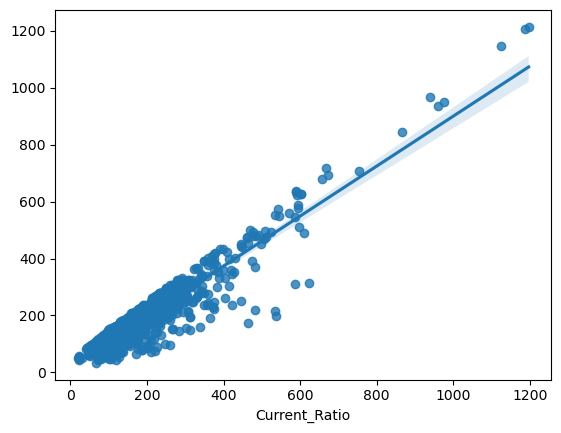

In [107]:
# LASSO REGRESYONU
lassomodel_1 = Lasso(alpha=0.35).fit(x_egitimset, y_egitimset)
lassopredict = lassomodel_1.predict(x_egitimset)
print("LASSO R2 :", lassomodel_1.score(x_egitimset, y_egitimset))
print("LASSO MSE:", mean_squared_error(y_egitimset, lassopredict))
sbn.regplot(x=y_egitimset, y=lassopredict)

In [108]:
# LASSO ALPHA OPTİMİZASYONU (CV)
lassomodel_2 = LassoCV(cv=7, max_iter=1000, random_state=40).fit(x_egitimset, y_egitimset)
lassopredict_2 = lassomodel_2.predict(x_egitimset)
print("Optimum Alpha :", lassomodel_2.alpha_)
print("R2 :", lassomodel_2.score(x_egitimset, y_egitimset))
print("MSE:", mean_squared_error(y_egitimset, lassopredict_2))
print("RMSE:", np.sqrt(mean_squared_error(y_egitimset, lassopredict_2)))
print("MAPE:", mean_absolute_percentage_error(y_egitimset, lassopredict_2))

Optimum Alpha : 619411011.2352048
R2 : 0.11349251184352926
MSE: 15066.500202931747
RMSE: 122.74567284809574
MAPE: 0.5779704891971625


In [109]:
# Ridge Regresyonu tercih edilmelidir.
# LassoCV'nin aşırı alfa seçmesi, modelin aşırı sadeleşmesine neden oldu.
# Ridge, alfa değişiminden daha az etkileniyor ve stabil sonuç veriyor.

# Ridge ve basit Lasso (alpha=0.35) benzer performans gösterdi, ancak Ridge'in optimizasyonu daha güvenilir.

In [110]:
# KNN EN YAKIN KOMŞULUK REGRESYONU

In [111]:
knn_1 = KNeighborsRegressor(n_neighbors=5).fit(x_egitimset, y_egitimset)
y_hat_knn = knn_1.predict(x_egitimset)
print("MSE :", mean_squared_error(y_egitimset, y_hat_knn))
print("R^2 :", r2_score(y_egitimset, y_hat_knn))

MSE : 7214.047405978785
R^2 : 0.5755280284620106


In [112]:
# k için basit tarama (1‑20)
mse_k, r2_k = [], []
for k in range(1, 21):
    mdl = KNeighborsRegressor(n_neighbors=k).fit(x_egitimset, y_egitimset)
    pred = mdl.predict(x_testset)
    mse_k.append(mean_squared_error(y_testset, pred))
    r2_k.append(r2_score(y_testset, pred))


In [113]:
print("MSE listesi:", mse_k)
print("R² listesi:", r2_k)
print("min MSE :", min(mse_k))
print("max R² :", max(r2_k))


MSE listesi: [8451.608988764045, 7809.079213483146, 8097.520349563046, 8647.935533707865, 8944.008808988763, 9272.6822721598, 9426.94785599633, 9762.56021769663, 9769.019864058815, 9731.335460674158, 9662.598087101867, 9594.435674157303, 9756.268811914102, 9742.093166704884, 9797.277213483145, 9776.848498946629, 9903.191438902064, 9848.85723401304, 9771.937109776214, 9684.846898876405]
R² listesi: [0.43563926194783753, 0.47854453343875725, 0.4592837213662785, 0.42252945126551344, 0.40275899899101886, 0.38081165162793507, 0.37051048425663624, 0.34809978821042586, 0.34766844184864254, 0.3501848381627046, 0.3547748132707105, 0.35932639507341235, 0.348519900216972, 0.3494664865537601, 0.3457815421354975, 0.3471456805414048, 0.33870906274049584, 0.3423372585093032, 0.3474736411960876, 0.3532891368923363]
min MSE : 7809.079213483146
max R² : 0.47854453343875725


In [114]:
param_grid = {"n_neighbors": list(range(1, 15))}
grid_knn   = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5).fit(x_egitimset, y_egitimset)
best_k     = grid_knn.best_params_["n_neighbors"]
print("En iyi k :", best_k)

En iyi k : 2


In [115]:
knn_best = KNeighborsRegressor(n_neighbors=best_k).fit(x_egitimset, y_egitimset)
y_hat_best = knn_best.predict(x_testset)
print("BEST MSE :", mean_squared_error(y_testset, y_hat_best))
print("BEST R² :", r2_score(y_testset, y_hat_best))

BEST MSE : 7809.079213483146
BEST R² : 0.47854453343875725


In [116]:
# Eğitim setiyle KNN için
# Model eğitim verisinde orta düzey performans gösteriyor.
# R² değeri, modelin bağımlı değişkenin yaklaşık %57'sini açıkladığını gösteriyor.

In [117]:
#GridSearch için

# Optimum k Değeri: 2
# Modelin test verisindeki performansı, eğitim verisine göre daha düşük.

# k Değerlerinin Etkisi:
# k=1-20 aralığında en iyi performans k=2 ile elde edilmiş.
# Ancak R-squared değerleri genel olarak düşük (0.34-0.48 arası).

In [118]:
# KNN, bu veri setinde yetersiz kaldı.

In [119]:
# SUPPORT VECTOR MACHINES – DESTEK VEKTÖR MAKİNESİ REGRESYONU

In [120]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [121]:
# YAPAY SİNİR AĞLARI (ANN)

In [122]:
# Ölçekleme
scl = StandardScaler().fit(x_egitimset)
x_train_scl = scl.transform(x_egitimset)
x_test_scl  = scl.transform(x_testset)


In [123]:
ann_1 = MLPRegressor(random_state=42, max_iter=2000).fit(x_train_scl, y_egitimset)
print("Katman:", ann_1.n_layers_, "  Gizli:", ann_1.hidden_layer_sizes)
print("MSE :", mean_squared_error(y_testset, ann_1.predict(x_test_scl)))
print("R^2 :", r2_score(y_testset,  ann_1.predict(x_test_scl)))


Katman: 3   Gizli: (100,)
MSE : 1475.1802400921001
R^2 : 0.9014940456704573


In [124]:
# Hiperparametre Taraması
param_grid = {
    "alpha": [0.01, 0.1],
    "hidden_layer_sizes": [(50, 30), (100,)],
    "activation": ["relu"],
    "max_iter": [1500]
}

gs_ann = GridSearchCV(MLPRegressor(random_state=42), param_grid, cv=5, n_jobs=-1)
gs_ann.fit(x_train_scl, y_egitimset)
print("En iyi parametreler:", gs_ann.best_params_)

GridSearchCV(cv=5, estimator=MLPRegressor(random_state=42), n_jobs=-1,
             param_grid={'activation': ['relu'], 'alpha': [0.01, 0.1],
                         'hidden_layer_sizes': [(50, 30), (100,)],
                         'max_iter': [1500]})

En iyi parametreler: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (50, 30), 'max_iter': 1500}


In [252]:
best_ann = MLPRegressor(**gs_ann.best_params_, random_state=42).fit(x_train_scl, y_egitimset)
print("BEST MSE :", mean_squared_error(y_testset, best_ann.predict(x_test_scl)))
print("BEST R^2 :", r2_score(y_testset,  best_ann.predict(x_test_scl)))

BEST MSE : 1300.1572207776621
BEST R^2 : 0.9131813019654103


In [254]:
# Temel ANN Modeli (Hiperparametre Optimizasyonsuz)
# MSE: 1475.18

# R²: 0.901

# Yapı: 3 katman (1 gizli katman, 100 nöron)

# Yorum: Başlangıç modeli zaten yüksek performans gösteriyor (R² > 0.9).

# GridSearch ile Optimize Edilmiş ANN
# En İyi Parametreler:

# alpha=0.01 (regularizasyon),

# hidden_layer_sizes=(50, 30) (2 gizli katman),

# activation=relu.

# Test Performansı:

# MSE: 1300.16 (önceki modelden %12 daha iyi),

# R²: 0.913 (önceki modelden %1.2 daha iyi).

In [256]:
# ANN, bu veri setinde en iyi performansı gösterdi (MSE: 1300, R²: 0.913).

# Ridge, basitliği ve hızıyla makul bir alternatif (MSE: 2093, R²: 0.877).

# KNN, yüksek boyutlu veride başarısız oldu (MSE: 7809, R²: 0.478).

In [258]:
# CART (Classification and Regression Tree)

In [260]:
cart_0 = DecisionTreeRegressor().fit(x_egitimset, y_egitimset)
pred_0 = cart_0.predict(x_testset)
print("Başlangıç MSE :", mean_squared_error(y_testset, pred_0))
print("Başlangıç R²  :", r2_score(y_testset,  pred_0))

Başlangıç MSE : 2352.0988764044946
Başlangıç R²  : 0.8429373318590517


In [262]:
param_grid = {
    "min_samples_split": [2, 4, 6],
    "max_leaf_nodes": [5, 10]
}
cart_grid = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5).fit(x_egitimset, y_egitimset)
best_params = cart_grid.best_params_
print("En iyi parametreler:", best_params)

En iyi parametreler: {'max_leaf_nodes': 10, 'min_samples_split': 2}


In [264]:
cart_best = DecisionTreeRegressor(**best_params).fit(x_egitimset, y_egitimset)
pred_best = cart_best.predict(x_testset)
print("Best MSE :", mean_squared_error(y_testset, pred_best))
print("Best R²  :", r2_score(y_testset,  pred_best))

Best MSE : 2548.55759018373
Best R²  : 0.8298186955316225


In [266]:
#  Temel CART Modeli (Hiperparametre Optimizasyonsuz)
# MSE: 2352.10

# R²: 0.8429

# Yorum: Başlangıç modeli oldukça iyi performans gösteriyor (R² > 0.84)

In [270]:
# GridSearch ile Optimize Edilmiş CART
# En İyi Parametreler:

# max_leaf_nodes=10

# min_samples_split=2

# Test Performansı:

# MSE: 2548.56 (temel modele göre daha kötü)

# R²: 0.8298 (temel modele göre daha düşük)

In [274]:
# Bu veri setinde:

# ANN > Ridge > CART > KNN sıralaması oluştu

# CART, Ridge'e göre daha düşük performans gösterdi

In [276]:
# BOOTSTRAP AGGREGATION (BAGGING)

In [278]:
model_BAG = BaggingRegressor(bootstrap_features=True, random_state=42).fit(x_egitimset, y_egitimset)
pred_BAG  = model_BAG.predict(x_testset)
print("BAG MODEL MSE:", mean_squared_error(y_testset, pred_BAG))
print("BAG MODEL R^2:", r2_score(y_testset,  pred_BAG))

BAG MODEL MSE: 2452.660696629213
BAG MODEL R^2: 0.8362222622010327


In [280]:
param_grid = {
    "n_estimators": [5, 10, 20]
}
bag_cv = GridSearchCV(BaggingRegressor(bootstrap_features=True, random_state=42),
                      param_grid, cv=5, n_jobs=-1).fit(x_egitimset, y_egitimset)
print("BOOTSTRAP EN İYİ PARAMETRE:", bag_cv.best_params_)

BOOTSTRAP EN İYİ PARAMETRE: {'n_estimators': 20}


In [282]:
best_n  = bag_cv.best_params_["n_estimators"]
bag_best = BaggingRegressor(bootstrap_features=True,
                            n_estimators=best_n,
                            random_state=42).fit(x_egitimset, y_egitimset)
best_pred = bag_best.predict(x_testset)
print("OPTİMİZASYON SONUCU BAG MODEL MSE:", mean_squared_error(y_testset, best_pred))
print("OPTİMİZASYON SONUCU BAG MODEL R^2:",  r2_score(y_testset,  best_pred))

OPTİMİZASYON SONUCU BAG MODEL MSE: 1982.0107528089889
OPTİMİZASYON SONUCU BAG MODEL R^2: 0.8676501654572899


In [286]:
# Temel Bagging Modeli
# MSE: 2452.66

# R²: 0.8362
# Başlangıç modeli CART'tan daha iyi performans gösterdi

In [288]:
# GridSearch ile Optimize Edilmiş Bagging
# En İyi Parametre: n_estimators=20

# Test Performansı:

# MSE: 1982.01 (Neredeyse 5te 1 oranında iyileşme)

# R²: 0.8676 (Daha iyi)

In [290]:
# Performans Değerlendirmesi:

# Bagging, Ridge ile benzer performans gösterdi

# ANN hala açık ara lider

# CART'tan önemli ölçüde daha iyi

In [292]:
# RANDOM FOREST

In [294]:
rf_0 = RandomForestRegressor(random_state=42).fit(x_egitimset, y_egitimset)
pred_0 = rf_0.predict(x_testset)
print("Başlangıç MSE :", mean_squared_error(y_testset, pred_0))
print("Başlangıç R²  :", r2_score(y_testset,  pred_0))

Başlangıç MSE : 1119.0681604494384
Başlangıç R²  : 0.9252736214132075


In [296]:
param_grid = {
    "max_depth": [5, 10],
    "max_features": [3, 5],
    "n_estimators": [100, 150]
}
rf_cv = GridSearchCV(rf_0, param_grid, cv=3, n_jobs=-1).fit(x_egitimset, y_egitimset)
best_params = rf_cv.best_params_
print("En iyi parametreler:", best_params)

En iyi parametreler: {'max_depth': 10, 'max_features': 5, 'n_estimators': 150}


In [298]:
rf_best = RandomForestRegressor(**best_params, random_state=42).fit(x_egitimset, y_egitimset)
pred_best = rf_best.predict(x_testset)
print("Best MSE :", mean_squared_error(y_testset, pred_best))
print("Best R²  :", r2_score(y_testset,  pred_best))

Best MSE : 1143.0312955274212
Best R²  : 0.923673470173765


In [300]:
# Temel Random Forest Modeli
# MSE: 1119.07

# R²: 0.9253

# Başlangıç modeli tüm modeller arasında en iyi performansı gösterdi

In [302]:
# GridSearch ile Optimize Edilmiş Random Forest
# En İyi Parametreler:

# max_depth=10

# max_features=5

# n_estimators=150

In [304]:
# Test Performansı:

# MSE: 1143.03 (kötüleşti)

# R²: 0.9237 (kötüleşti)

In [306]:
# Performans Değerlendirmesi:

# Random Forest açık ara en iyi performansı gösterdi

# Optimizasyon gerekli olmayabilir (temel model yeterli)

In [308]:
# GRADIENT BOOSTING

In [310]:
grb_0 = GradientBoostingRegressor(random_state=42).fit(x_egitimset, y_egitimset)
pred_0 = grb_0.predict(x_testset)
print("Başlangıç MSE :", mean_squared_error(y_testset, pred_0))
print("Başlangıç R²  :", r2_score(y_testset,  pred_0))


Başlangıç MSE : 1106.9887961813752
Başlangıç R²  : 0.9260802274621371


In [312]:
param_grid = {
    'n_estimators': [100, 150],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}
grb_cv = GridSearchCV(grb_0, param_grid, cv=3, n_jobs=-1).fit(x_egitimset, y_egitimset)
print("En iyi parametreler:", grb_cv.best_params_)

En iyi parametreler: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150, 'subsample': 0.8}


In [314]:
best_grb = GradientBoostingRegressor(**grb_cv.best_params_, random_state=42).fit(x_egitimset, y_egitimset)
pred_best = best_grb.predict(x_testset)
print("Best MSE :", mean_squared_error(y_testset, pred_best))
print("Best R²  :", r2_score(y_testset,  pred_best))

Best MSE : 989.2974970941666
Best R²  : 0.9339391272886053


In [316]:
# Temel Gradient Boosting Modeli
# MSE: 1106.99

# R²: 0.9269

# Başlangıç modeli Random Forest'i geçerek en iyi performansı gösterdi

In [320]:
# GridSearch ile Optimize Edilmiş Gradient Boosting
# En İyi Parametreler:

# learning_rate=0.1

# max_depth=5

# n_estimators=150

# subsample=0.8

# Test Performansı:

# MSE: 989.30 (iyileşti)

# R²: 0.9339 (iyileşti)

In [322]:
# Nihai Değerlendirme:

# Gradient Boosting mutlak lider oldu

# Optimizasyonla daha da iyileşti

# R² > 0.93 ile mükemmele yakın sonuç

In [324]:
# XGBOOST MODELİ

In [326]:
xgb_0 = XGBRegressor(random_state=42).fit(x_egitimset, y_egitimset)
pred_0 = xgb_0.predict(x_testset)
print("MSE (ilk model):", mean_squared_error(y_testset, pred_0))
print("R² (ilk model):",  r2_score(y_testset,  pred_0))


MSE (ilk model): 1186.1767367031755
R² (ilk model): 0.9207924101226072


In [328]:
param_grid = {
    "n_estimators": [100, 150],
    "learning_rate": [0.05, 0.1],
    "max_depth": [3, 5],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}

xgb_cv = GridSearchCV(XGBRegressor(random_state=42),
                      param_grid, cv=3, n_jobs=-1)
xgb_cv.fit(x_egitimset, y_egitimset)
print("En iyi parametreler:", xgb_cv.best_params_)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.05, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [100, 150], 'subsample': [0.8, 1.0]})

En iyi parametreler: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150, 'subsample': 0.8}


In [330]:
best_xgb = XGBRegressor(**xgb_cv.best_params_, random_state=42).fit(x_egitimset, y_egitimset)
pred_best = best_xgb.predict(x_testset)
print("Best Model MSE:", mean_squared_error(y_testset, pred_best))
print("Best Model R² :",  r2_score(y_testset,  pred_best))

Best Model MSE: 1048.5819531255813
Best Model R² : 0.929980375836025


In [332]:
# Temel XGBoost Modeli
# MSE: 1186.18

# R²: 0.9208

# Başlangıç modeli Gradient Boosting ve Random Forest'in ardından 3. sırada

In [334]:
# GridSearch ile Optimize Edilmiş XGBoost
# En İyi Parametreler:

# colsample_bytree=0.8

# learning_rate=0.1

# max_depth=5

# n_estimators=150

# subsample=0.8

# Test Performansı:

# MSE: 1048.58 (iyileşti)

# R²: 0.9300 (iyileşti)

In [336]:
# Model Seçimi İçin:

# Mutlak performans için Gradient Boosting

# Hız/performans dengesi için XGBoost

# Interpretability için Random Forest

In [338]:
# Bu projede New York Exchange Data seti kullanılarak çok sayıda regresyon modeli uygulanmış ve karşılaştırıldı.
# OLS, Linear Regression, Ridge, Lasso, PCR, PLS, KNN, ANN, CART, Bagging, Random Forest, Gradient Boosting ve XGBoost
# modelleri denendi.
# Model performanslarına MSE, RMSE, R² ve MAPE metrikleri üzerinden bakıldı.
# XGBoost ve Gradient Boosting gibi modeller diğerlerine göre daha başarılı sonuçlar buldu. 
# KNN gibi modeller verinin yapısına uymadı.

# Veri setine göre regresyon modelinin ne kadar ciddi değişimler yarattığı ve uygun modellerle çalışmanın ne kadar önemli olduğu 
# ayrıca model farkları anlaşıldı.